I am building a project where i code and learn all the fundamentals used in neural networks to big vission models and llm from scrathc without using and performant industry lib like numpy or pytorch. let start from basics of neural net as basic as vector addition and multiplication. lets go

# Basic vector algebra

# Building Deep Learning from First Principles 🔥

We'll implement everything from scratch using only Python's built-in types:
- Basic linear algebra (vectors, matrices)
- Gradients and backpropagation
- Neural networks (feedforward, CNNs, Transformers)
- LLMs and vision models

Our "mini-numpy" module will include:
- Vectors (1D lists)
- Matrices (lists of lists)
- Operations: addition, subtraction, dot product, scalar multiplication, transpose, etc.

## Vector Operations

A vector is simply a list of numbers:

In [2]:
import math

def vector_add(v, w):
    """Add two vectors elementwise"""
    assert len(v) == len(w), "Vectors must be the same length"
    return [v_i + w_i for v_i, w_i in zip(v, w)]

def vector_subtract(v, w):
    """Subtract w from v elementwise"""
    assert len(v) == len(w)
    return [v_i - w_i for v_i, w_i in zip(v, w)]

def scalar_multiply(c, v):
    """Multiply every element by scalar c"""
    return [c * v_i for v_i in v]

def vector_sum(v):
    """Sum all corresponding elements of single vector"""
    assert len(v) > 0, "No vectors provided!"
    # For 1D vectors, we simply sum all vectors element-wise
    return sum(v)

def dot(v, w):
    """Dot product of two vectors"""
    assert len(v) == len(w)
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [3]:
# Example vectors
v = [1, 2, 3]
w = [4, 5, 6]
c = 2  # scalar

# Test vector_add
result_add = vector_add(v, w)
print("Vector addition:", result_add)  # Should be [5, 7, 9]
assert result_add == [5, 7, 9]

# Test vector_subtract
result_subtract = vector_subtract(v, w)
print("Vector subtraction:", result_subtract)  # Should be [-3, -3, -3]
assert result_subtract == [-3, -3, -3]

# Test scalar_multiply
result_scalar = scalar_multiply(c, v)
print("Scalar multiplication:", result_scalar)  # Should be [2, 4, 6]
assert result_scalar == [2, 4, 6]

# Test vector_sum (for a single vector)
result_sum = vector_sum(v)
print("Vector sum:", result_sum)  # Should be 6
assert result_sum == 6

# Test dot product
result_dot = dot(v, w)
print("Dot product:", result_dot)  # Should be 1*4 + 2*5 + 3*6 = 32
assert result_dot == 32

# More complex example
v2 = [7, 8, 9]
# Sum of three vectors
result_multi_add = vector_add(vector_add(v, w), v2)
print("Sum of three vectors:", result_multi_add)  # Should be [12, 15, 18]
assert result_multi_add == [12, 15, 18]



Vector addition: [5, 7, 9]
Vector subtraction: [-3, -3, -3]
Scalar multiplication: [2, 4, 6]
Vector sum: 6
Dot product: 32
Sum of three vectors: [12, 15, 18]


Now let's move to Step 2: Vector Magnitude & Distance, which are essential for understanding geometry in neural networks — distances between embeddings, normalization layers, loss functions, etc.

🧠 Step 2 — Vector Magnitude, Norms, and Distance

We'll define three key concepts:

Magnitude (Length) — how long a vector is

‖v‖ = √(v₁² + v₂² + ⋯ + vₙ²)

Squared magnitude — used often in optimization (avoids costly square roots).

‖v‖² = v₁² + v₂² + ⋯ + vₙ²

Distance between two vectors — how far apart they are in space.

d(v,w) = √((v₁ - w₁)² + (v₂ - w₂)² + ⋯ + (vₙ - wₙ)²)


In [5]:
def sum_of_squares(v):
    """v1^2 + v2^2 + ... + vn^2"""
    return sum(v_i ** 2 for v_i in v)

def magnitude(v):
    """Euclidean length of vector"""
    return math.sqrt(sum_of_squares(v))

def squared_distance(v, w):
    """Squared Euclidean distance between v and w"""
    return sum((v_i - w_i) ** 2 for v_i, w_i in zip(v, w))

def distance(v, w):
    """Euclidean distance between v and w"""
    return math.sqrt(squared_distance(v, w))

In [6]:
a = [3, 4]
b = [0, 0]

print("‖a‖ =", magnitude(a))          # should be 5 (3-4-5 triangle)
print("‖a - b‖ =", distance(a, b))    # also 5
print("Squared distance =", squared_distance(a, b))  # should be 25

‖a‖ = 5.0
‖a - b‖ = 5.0
Squared distance = 25


🧠 Step 3 — Matrices: The Building Block of Neural Nets

A matrix is just a list of lists —
each inner list represents a row (or a vector).

Example:

A = [
    [1, 2, 3],
    [4, 5, 6]
]

This represents the matrix:

A = [
    1  2  3
    4  5  6
]

can be represented as

A = [[1, 2, 3],
     [4, 5, 6]]


In [8]:
def shape(A):
    """Return (#rows, #cols) of matrix A"""
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

def get_row(A, i):
    """Return i-th row of matrix A"""
    return A[i]

def get_col(A, j):
    """Return j-th column of matrix A"""
    return [A_i[j] for A_i in A]

def make_matrix(num_rows, num_cols, entry_fn):
    """
    Create a matrix given a function entry_fn(i, j)
    that returns the element at row i, column j.
    """
    return [[entry_fn(i, j) for j in range(num_cols)] for i in range(num_rows)]

def identity_matrix(n):
    """n×n Identity matrix"""
    return make_matrix(n, n, lambda i, j: 1 if i == j else 0)

In [9]:
A = [[1, 2, 3],
     [4, 5, 6]]

print("Shape:", shape(A))             # (2, 3)
print("Row 0:", get_row(A, 0))        # [1, 2, 3]
print("Col 1:", get_col(A, 1))        # [2, 5]
print("Identity(3):", identity_matrix(3))

Shape: (2, 3)
Row 0: [1, 2, 3]
Col 1: [2, 5]
Identity(3): [[1, 0, 0], [0, 1, 0], [0, 0, 1]]


🧩 Step 4 — Gradients and Differentiation
🧠 4.1 — The Core Idea

A neural network learns by minimizing a loss function 
𝐿
(
𝑤
)
L(w), where 
𝑤
w are weights.
To minimize 
𝐿
L, we need to know how small changes in 
𝑤
w affect 
𝐿
L.
That’s what the derivative or gradient tells us.

Mathematically:

𝑑
𝐿
𝑑
𝑤
=
slope of 
𝐿
(
𝑤
)
dw
dL
	​

=slope of L(w)

We can approximate the derivative using a finite difference:

𝑑
𝑓
𝑑
𝑥
≈
𝑓
(
𝑥
+
ℎ
)
−
𝑓
(
𝑥
−
ℎ
)
2
ℎ
dx
df
	​

≈
2h
f(x+h)−f(x−h)
	​


for very small 
ℎ
h (say 
1
𝑒
−
5
1e−5).

In [10]:
# grad_utils.py

def derivative(f, x, h=1e-5):
    """
    Numerical derivative of f at x using central difference.
    f: function f(x)
    x: point at which to differentiate
    """
    return (f(x + h) - f(x - h)) / (2 * h)


In [11]:
def f(x):
    return x**2  # derivative should be 2x

for x in [0, 1, 2, 3]:
    print(f"f'({x}) ≈ {derivative(f, x):.4f} (true={2*x})")


f'(0) ≈ 0.0000 (true=0)
f'(1) ≈ 2.0000 (true=2)
f'(2) ≈ 4.0000 (true=4)
f'(3) ≈ 6.0000 (true=6)


In [15]:
def f2(x):
    return x**3


for x in [0, 1, 2, 3]:
    print(f"f'({x}) ≈ {derivative(f2, x):.4f} (true={3*x**2})")



f'(0) ≈ 0.0000 (true=0)
f'(1) ≈ 3.0000 (true=3)
f'(2) ≈ 12.0000 (true=12)
f'(3) ≈ 27.0000 (true=27)


In [16]:
def gradient(f, v, h=1e-5):
    """
    Estimate gradient of f at vector v using finite differences.
    f: function f(v) that returns a scalar
    v: list of parameters
    """
    grad = []
    for i in range(len(v)):
        v_step_up = v[:]
        v_step_down = v[:]
        v_step_up[i] += h
        v_step_down[i] -= h
        grad_i = (f(v_step_up) - f(v_step_down)) / (2 * h)
        grad.append(grad_i)
    return grad

In [17]:
def f(v):
    # f(x, y) = x^2 + y^2
    x, y = v
    return x**2 + y**2

print("∇f([3, 4]) =", gradient(f, [3, 4]))  # should be [6, 8]


∇f([3, 4]) = [6.000000000128124, 7.999999999874773]


🧩 Step 4.4 — Using Gradients to Optimize (Gradient Descent)

This is where we first teach our model to move in the direction that reduces loss.

Gradient descent rule:

𝑥
new
=
𝑥
−
𝜂
⋅
∇
𝑓
(
𝑥
)
x
new
	​

=x−η⋅∇f(x)

where 
𝜂
η is the learning rate.

In [18]:
def gradient_descent(f, init_v, learning_rate=0.1, steps=100):
    v = init_v
    for step in range(steps):
        grad = gradient(f, v)
        v = [v_i - learning_rate * g_i for v_i, g_i in zip(v, grad)]
    return v


In [19]:
def f(v):
    x, y = v
    return (x - 3)**2 + (y + 1)**2

opt_v = gradient_descent(f, init_v=[0, 0], learning_rate=0.1, steps=50)
print("Optimized v:", opt_v)


Optimized v: [2.9999571825692226, -0.9999857275230724]


🧠 Step 5 — Building a Single Neuron (Forward + Backward)

A neuron is the smallest building block of a neural network.
It takes inputs, multiplies by weights, adds a bias, and applies an activation function.

🧩 5.1 — Neuron formula

Given:

inputs: 
𝑥
1
,
𝑥
2
,
…
,
𝑥
𝑛
weights: 
𝑤
1
,
𝑤
2
,
…
,
𝑤
𝑛
bias: 
𝑏
inputs: x
1
	​

,x
2
	​

,…,x
n
	​

weights: w
1
	​

,w
2
	​

,…,w
n
	​

bias: b

Then:

𝑦
=
𝑓
(
𝑤
1
𝑥
1
+
𝑤
2
𝑥
2
+
…
+
𝑤
𝑛
𝑥
𝑛
+
𝑏
)
y=f(w
1
	​

x
1
	​

+w
2
	​

x
2
	​

+…+w
n
	​

x
n
	​

+b)

where 
𝑓
f is an activation function (e.g. sigmoid, ReLU).

In [20]:
import math

def sigmoid(x):
    """Sigmoid squashes values to (0, 1)"""
    return 1 / (1 + math.exp(-x))

def sigmoid_prime(x):
    """Derivative of sigmoid"""
    s = sigmoid(x)
    return s * (1 - s)

def relu(x):
    return x if x > 0 else 0

def relu_prime(x):
    return 1 if x > 0 else 0


In [23]:


def neuron_output(weights, inputs, bias, activation=sigmoid):
    """Compute output of a single neuron"""
    z = dot(weights, inputs) + bias
    return activation(z)


In [24]:
inputs = [1.0, 2.0, 3.0]
weights = [0.5, -0.2, 0.1]
bias = 0.0

print("Neuron output:", neuron_output(weights, inputs, bias))

Neuron output: 0.598687660112452


In [25]:
import random

def train_single_neuron(data, learning_rate=0.1, steps=1000):
    """
    data: list of (x, y_true) pairs
    learning_rate: step size for gradient descent
    steps: number of iterations
    """
    # initialize weight and bias randomly
    w = random.uniform(-1, 1)
    b = random.uniform(-1, 1)
    
    for step in range(steps):
        dw, db = 0.0, 0.0  # gradients
        loss = 0.0
        for x, y_true in data:
            # forward
            z = w * x + b
            y_pred = sigmoid(z)
            
            # loss (Mean Squared Error)
            error = y_pred - y_true
            loss += error ** 2
            
            # backprop: derivative of loss wrt w and b
            dL_dy = 2 * error
            dy_dz = sigmoid_prime(z)
            dz_dw = x
            dz_db = 1
            
            dw += dL_dy * dy_dz * dz_dw
            db += dL_dy * dy_dz * dz_db
        
        # average gradients
        dw /= len(data)
        db /= len(data)
        loss /= len(data)
        
        # update weights
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # monitor progress
        if step % 100 == 0:
            print(f"Step {step}: loss={loss:.6f}, w={w:.3f}, b={b:.3f}")
    
    return w, b


In [28]:
# Generate training data for y = 2x
data = [(x, 2 * x) for x in [0.0, 0.5, 1.0, 1.5, 2.0]]

w, b = train_single_neuron(data, learning_rate=0.5, steps=1000)
print("Learned weight:", w)
print("Learned bias:", b)


Step 0: loss=5.389308, w=-0.599, b=0.000
Step 100: loss=2.878920, w=3.310, b=0.072
Step 200: loss=2.840758, w=4.436, b=-0.670
Step 300: loss=2.827483, w=5.175, b=-0.993
Step 400: loss=2.820845, w=5.712, b=-1.191
Step 500: loss=2.816840, w=6.134, b=-1.334
Step 600: loss=2.814150, w=6.483, b=-1.446
Step 700: loss=2.812213, w=6.779, b=-1.538
Step 800: loss=2.810748, w=7.038, b=-1.616
Step 900: loss=2.809601, w=7.268, b=-1.683
Learned weight: 7.471839744996861
Learned bias: -1.7427369012286837


In [29]:
class Neuron:
    def __init__(self, num_inputs, activation=sigmoid):
        self.weights = [random.uniform(-1, 1) for _ in range(num_inputs)]
        self.bias = random.uniform(-1, 1)
        self.activation = activation

    def forward(self, inputs):
        """Compute neuron output and store intermediate z for backprop"""
        self.inputs = inputs
        self.z = dot(self.weights, inputs) + self.bias
        self.output = self.activation(self.z)
        return self.output

In [30]:
class Layer:
    def __init__(self, num_inputs, num_neurons, activation=sigmoid):
        self.neurons = [Neuron(num_inputs, activation) for _ in range(num_neurons)]

    def forward(self, inputs):
        """Feed inputs to all neurons and collect outputs"""
        self.inputs = inputs
        self.outputs = [neuron.forward(inputs) for neuron in self.neurons]
        return self.outputs

In [31]:
class NeuralNetwork:
    def __init__(self, layer_sizes):
        """
        layer_sizes: e.g. [2, 3, 1]
        means 2 inputs → hidden layer of 3 neurons → 1 output neuron
        """
        self.layers = [
            Layer(num_inputs=layer_sizes[i], num_neurons=layer_sizes[i + 1])
            for i in range(len(layer_sizes) - 1)
        ]

    def forward(self, inputs):
        for layer in self.layers:
            inputs = layer.forward(inputs)
        return inputs


In [35]:
net = NeuralNetwork([2, 5, 1])
output = net.forward([1.0, 0.5])
print("Output:", output)

Output: [0.34180279008819]


🧩 6.4 — Backpropagation (manual)

We’ll now make the network learn.
We’ll implement gradient descent on all weights and biases via backpropagation.

⚙️ Key idea

Compute forward pass.

Compute loss (e.g., Mean Squared Error).

Compute output error (dL/dz for last layer).

Propagate error backward through layers.

Update weights and biases.

In [41]:
class NeuralNetwork:
    def __init__(self, layer_sizes, activation=sigmoid, activation_prime=sigmoid_prime):
        self.layers = [
            Layer(layer_sizes[i], layer_sizes[i + 1], activation)
            for i in range(len(layer_sizes) - 1)
        ]
        self.activation_prime = activation_prime

    def forward(self, inputs):
        for layer in self.layers:
            inputs = layer.forward(inputs)
        return inputs

    def backward(self, target, learning_rate=0.1):
        # Compute output layer error
        output_layer = self.layers[-1]
        errors = []
        for i, neuron in enumerate(output_layer.neurons):
            dL_dy = 2 * (neuron.output - target[i])  # MSE derivative
            dy_dz = self.activation_prime(neuron.z)
            errors.append(dL_dy * dy_dz)

        # Propagate backwards through layers
        for l in reversed(range(len(self.layers))):
            layer = self.layers[l]
            new_errors = [0.0] * len(layer.neurons[0].inputs)

            for j, neuron in enumerate(layer.neurons):
                error = errors[j]
                # FIRST: accumulate errors for previous layer using OLD weights (before update)
                for k in range(len(neuron.inputs)):
                    new_errors[k] += neuron.weights[k] * error
                
                # THEN: update weights and bias using gradients
                for k, x_k in enumerate(neuron.inputs):
                    grad_w = error * x_k
                    neuron.weights[k] -= learning_rate * grad_w
                neuron.bias -= learning_rate * error

            # Apply activation derivative for hidden layers
            if l > 0:
                prev_layer = self.layers[l - 1]
                for k, prev_neuron in enumerate(prev_layer.neurons):
                    new_errors[k] *= self.activation_prime(prev_neuron.z)
            
            errors = new_errors


We’ll train on the XOR problem, a classic nonlinear dataset that can’t be solved by one neuron.

In [42]:
data = [
    ([0, 0], [0]),
    ([0, 1], [1]),
    ([1, 0], [1]),
    ([1, 1], [0]),
]

net = NeuralNetwork([2, 2, 1])  # 2 inputs → 2 hidden → 1 output

for epoch in range(10000):
    total_loss = 0
    for x, y_true in data:
        y_pred = net.forward(x)
        total_loss += sum((y_true[i] - y_pred[i])**2 for i in range(len(y_true)))
        net.backward(y_true, learning_rate=1.0)
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: loss={total_loss:.6f}")

print("\nFinal outputs:")
for x, y_true in data:
    print(x, "->", net.forward(x))


Epoch 0: loss=1.253331
Epoch 1000: loss=0.003451
Epoch 2000: loss=0.001467
Epoch 3000: loss=0.000923
Epoch 4000: loss=0.000672
Epoch 5000: loss=0.000527
Epoch 6000: loss=0.000433
Epoch 7000: loss=0.000367
Epoch 8000: loss=0.000319
Epoch 9000: loss=0.000282

Final outputs:
[0, 0] -> [0.007945477925819214]
[0, 1] -> [0.9925443378711539]
[1, 0] -> [0.9908896502550989]
[1, 1] -> [0.007089798656080845]



## Detailed explanation of your NeuralNetwork class (focus: backward)

I'll walk through the __init__, forward, then go line-by-line through backward with the math.

High-level recap

layer_sizes is something like [input_dim, hidden_dim, ..., output_dim].

self.layers is a list of Layer objects. Each Layer contains Neuron objects that expose:

neuron.weights — list of weights (length = number of inputs to that neuron).

neuron.bias — scalar bias.

neuron.inputs — the input vector that was used on the most recent forward pass (stored for backprop).

neuron.z — pre-activation scalar = dot(weights, inputs) + bias (stored).

neuron.output — post-activation value (activation(z)) (stored).

__init__ and forward
def __init__(..., activation=sigmoid, activation_prime=sigmoid_prime):
    self.layers = [...]
    self.activation_prime = activation_prime


activation_prime is the derivative function for the activation (i.e., 
𝑓
′
(
𝑧
)
f
′
(z)). You need f'(z) for backprop.

def forward(self, inputs):
    for layer in self.layers:
        inputs = layer.forward(inputs)
    return inputs


Chains forward through layers. Each layer.forward should set each neuron's .inputs, .z, and .output. The final returned inputs is the network output (list).

backward(self, target, learning_rate=0.1) — detailed walkthrough
1) Compute output-layer deltas (errors)
output_layer = self.layers[-1]
errors = []
for i, neuron in enumerate(output_layer.neurons):
    dL_dy = 2 * (neuron.output - target[i])  # MSE derivative
    dy_dz = self.activation_prime(neuron.z)
    errors.append(dL_dy * dy_dz)


Math:

Loss used: Mean Squared Error per sample (not averaged across batch here). For a single output neuron with MSE 
𝐿
=
(
𝑦
−
𝑡
)
2
L=(y−t)
2
, derivative w.r.t. output 
𝑦
y is 
∂
𝐿
∂
𝑦
=
2
(
𝑦
−
𝑡
)
∂y
∂L
	​

=2(y−t). You correctly compute dL_dy.

For the neuron we want 
∂
𝐿
∂
𝑧
∂z
∂L
	​

 (where 
𝑧
z is pre-activation), and 
∂
𝑦
∂
𝑧
=
𝑓
′
(
𝑧
)
∂z
∂y
	​

=f
′
(z). So:

𝛿
=
∂
𝐿
∂
𝑧
=
∂
𝐿
∂
𝑦
⋅
𝑓
′
(
𝑧
)
=
2
(
𝑦
−
𝑡
)
⋅
𝑓
′
(
𝑧
)
δ=
∂z
∂L
	​

=
∂y
∂L
	​

⋅f
′
(z)=2(y−t)⋅f
′
(z)

errors is a list of 
𝛿
𝑗
δ
j
	​

 for each output neuron 
𝑗
j. Each error represents 
∂
𝐿
/
∂
𝑧
𝑗
∂L/∂z
j
	​

.

2) Loop layers in reverse (backpropagate)
for l in reversed(range(len(self.layers))):
    layer = self.layers[l]
    new_errors = [0.0] * len(layer.neurons[0].inputs)


Iterate layers from last to first.

new_errors will accumulate errors for the previous layer’s neurons. Its length equals the number of inputs to each neuron in the current layer, which is also the number of neurons in the previous layer (except for the first layer where inputs are raw features).

3) For each neuron: accumulate previous-layer errors before updating weights
    for j, neuron in enumerate(layer.neurons):
        error = errors[j]
        # FIRST: accumulate errors for previous layer using OLD weights (before update)
        for k in range(len(neuron.inputs)):
            new_errors[k] += neuron.weights[k] * error


Math & reasoning:

Backpropagate errors to the previous layer using the chain rule. If current layer’s neuron 
𝑗
j has weight 
𝑤
𝑗
𝑘
w
jk
	​

 connecting it to previous-layer neuron 
𝑘
k:

∂
𝐿
∂
𝑧
𝑘
(
𝑝
𝑟
𝑒
𝑣
)
 receives contribution 
𝑤
𝑗
𝑘
⋅
𝛿
𝑗
∂z
k
(prev)
	​

∂L
	​

 receives contribution w
jk
	​

⋅δ
j
	​


(sum over all j connected to k).

So new_errors[k] += neuron.weights[k] * error builds the sum:

new_errors
[
𝑘
]
=
∑
𝑗
𝑤
𝑗
𝑘
⋅
𝛿
𝑗
new_errors[k]=
j
∑
	​

w
jk
	​

⋅δ
j
	​


IMPORTANT: this must be done with the old weights (weights that produced the forward pass) — hence accumulation happens before you change neuron.weights. Your code correctly follows this order.

4) Then update the current neuron's weights & bias using gradient
        # THEN: update weights and bias using gradients
        for k, x_k in enumerate(neuron.inputs):
            grad_w = error * x_k
            neuron.weights[k] -= learning_rate * grad_w
        neuron.bias -= learning_rate * error


Math:

For a given neuron 
𝑗
j, with input 
𝑥
𝑘
x
k
	​

,

∂
𝐿
∂
𝑤
𝑗
𝑘
=
𝛿
𝑗
⋅
𝑥
𝑘
∂w
jk
	​

∂L
	​

=δ
j
	​

⋅x
k
	​


because 
∂
𝑧
𝑗
/
∂
𝑤
𝑗
𝑘
=
𝑥
𝑘
∂z
j
	​

/∂w
jk
	​

=x
k
	​

 and 
∂
𝐿
/
∂
𝑤
𝑗
𝑘
=
∂
𝐿
/
∂
𝑧
𝑗
⋅
∂
𝑧
𝑗
/
∂
𝑤
𝑗
𝑘
∂L/∂w
jk
	​

=∂L/∂z
j
	​

⋅∂z
j
	​

/∂w
jk
	​

.

Bias gradient is 
∂
𝐿
/
∂
𝑏
𝑗
=
𝛿
𝑗
∂L/∂b
j
	​

=δ
j
	​

.

You apply gradient descent update 
𝑤
←
𝑤
−
𝜂
⋅
grad
𝑤
w←w−η⋅grad
w
	​

 — correct.

Why update after accumulation?

If you updated weights first, then new_errors would be computed using changed weights (which correspond to a different forward function) and would break the correctness of backprop. So the order you chose is essential: accumulate, then update.

5) Apply activation derivative for previous layer
    # Apply activation derivative for hidden layers
    if l > 0:
        prev_layer = self.layers[l - 1]
        for k, prev_neuron in enumerate(prev_layer.neurons):
            new_errors[k] *= self.activation_prime(prev_neuron.z)
    
    errors = new_errors


Math:

new_errors[k] at this moment is:

∑
𝑗
𝑤
𝑗
𝑘
⋅
𝛿
𝑗
=
∑
𝑗
𝑤
𝑗
𝑘
⋅
∂
𝐿
∂
𝑧
𝑗
j
∑
	​

w
jk
	​

⋅δ
j
	​

=
j
∑
	​

w
jk
	​

⋅
∂z
j
	​

∂L
	​


which equals 
∂
𝐿
/
∂
𝑎
𝑘
(
𝑝
𝑟
𝑒
𝑣
)
∂L/∂a
k
(prev)
	​

 (where 
𝑎
a is activation value).

To get 
∂
𝐿
/
∂
𝑧
𝑘
(
𝑝
𝑟
𝑒
𝑣
)
∂L/∂z
k
(prev)
	​

 (the delta for previous layer), multiply by the derivative of the activation at z_k^{(prev)}:

𝛿
𝑘
(
𝑝
𝑟
𝑒
𝑣
)
=
∂
𝐿
∂
𝑧
𝑘
(
𝑝
𝑟
𝑒
𝑣
)
=
∂
𝐿
∂
𝑎
𝑘
(
𝑝
𝑟
𝑒
𝑣
)
⋅
𝑓
′
(
𝑧
𝑘
(
𝑝
𝑟
𝑒
𝑣
)
)
δ
k
(prev)
	​

=
∂z
k
(prev)
	​

∂L
	​

=
∂a
k
(prev)
	​

∂L
	​

⋅f
′
(z
k
(prev)
	​

)

That is exactly what new_errors[k] *= activation_prime(prev_neuron.z) does.

You do if l > 0 because there is no previous layer for the first (input) layer — input features are not activated neurons.

After this, errors = new_errors prepares for the next iteration (moving backward).

Shape / dimensional sanity check (per-sample)

Let n_{l-1} = number of neurons in previous layer (or input dimension for first hidden).

Let n_l = number of neurons in layer l.

For layer l:

neuron.weights length = n_{l-1}

neuron.inputs length = n_{l-1}

errors length = n_l (one delta per neuron in current layer)

new_errors length = n_{l-1} (one accumulation per neuron in previous layer)

Everything matches: you accumulate contributions from n_l neurons into n_{l-1} previous-neuron error entries.

Why this implementation works (intuition)

You compute 
𝛿
δ at the outputs (error w.r.t. pre-activation).

For each layer you:

propagate error to previous neurons via weight-weighted sum,

convert that to previous-layer deltas by multiplying by activation derivatives,

update the current layer's weights using 
∂
𝐿
∂
𝑤
=
𝛿
⋅
input
∂w
∂L
	​

=δ⋅input.

Because you accumulate errors with old weights before modifying them, the gradient calculation is consistent with the forward pass.

Practical notes, improvements and gotchas

Single-sample SGD vs batch

This code computes gradients per single input (online / stochastic gradient descent). For batch training you should accumulate gradients over the batch and either average them or scale appropriately before updating. That usually yields more stable training.

Loss choice

You used MSE. For classification with sigmoid outputs, cross-entropy loss combined with sigmoid is numerically better and often trains faster (no saturation issues and simpler final gradient).

Activation choices and initializations

Sigmoid saturates. For deeper nets use ReLU (or GELU) in hidden layers and initialize weights properly:

Xavier/Glorot initialization for tanh/sigmoid.

He initialization for ReLU.

Your code will still work with sigmoid but may be slow or sensitive to learning rate.

Learning rate tuning

The learning rate must be chosen carefully. Consider adding learning-rate schedules or optimizers (momentum, RMSProp, Adam) later.

Gradient clipping

For stability you can clip gradients per weight (esp. for deeper nets / RNNs).

Numerical stability of activation_prime

If activation_prime computes derivative by recomputing sigmoid(z) each time, you might recompute expensive terms. You already store neuron.output — you can implement sigmoid_prime_from_output(s) = s*(1-s) and reuse neuron.output.

Weight update order

You update weights in-place while you accumulate new_errors with old weights — which is correct. If you changed this order, you'd need to copy weights.

Performance

Python lists and nested loops are slow. Later we can vectorize (your own mini-array) or compile critical parts. But for learning principles this is fine.

Regularization

Consider L2 weight decay (add - learning_rate * lambda * w), dropout in hidden layers, etc.

Bias update

You used neuron.bias -= learning_rate * error, which is correct since ∂L/∂b = δ.

Shape bugs to watch for

Make sure every neuron in a layer has the same len(neuron.inputs) (consistent architecture).

If you later do batched forward, .inputs must store the full input vector for that sample; for batch you'd store inputs per-sample or accumulate gradients accordingly.

Vectorization and cleaner code

You can simplify by making Layer support vector ops: keep weight matrix and bias vector and perform a matrix–vector multiply to compute all z's at once. That simplifies code and improves speed.

Edge-case: multiple outputs

Your initial dL_dy = 2 * (neuron.output - target[i]) assumes MSE where targets and outputs are aligned lists. Works fine for multiple outputs.

Complexity / runtime

Per sample, time complexity ≈ 
𝑂
(
#weights
)
O(#weights) (each weight is touched for gradient accumulation and update).

Memory is dominated by storing activations and inputs per neuron (for backprop).

Suggested immediate small improvements (I can implement these for you)

Reuse neuron.output for activation_prime to avoid recomputing activation inside derivative functions:

If you store neuron.output = f(z) then sigmoid_prime_from_output = lambda s: s*(1-s).

Make Layer expose weight matrices so you can do matrix–vector ops for speed and clarity.

Add a train() wrapper that loops over data, supports minibatches, logs loss, and optionally shuffles data.

Add predict() and evaluate() helpers.

Add gradient checking (numerical derivative) for small networks to verify backprop is correct.

Switch final-layer loss to cross-entropy when doing classification: L = -[ t*log(y) + (1-t)*log(1-y) ] and gradient is simpler with sigmoid.

Which direction is best next?

You said “then we will go forward.” I recommend the next step be one of these two (in order of what helps most):

A. Build a small autograd / computation-graph engine so you don’t manually derive gradients for every new op. This will let you write layers cleanly and automatically compute gradients for arbitrary architectures (good for extending to CNNs and Transformers).
B. Refactor the current code to vectorized layer-wise matrix operations and add minibatching, Xavier init, and an Adam optimizer — faster and more practical for training real examples.

Both are important; I suggest doing autograd first because it removes the tedium of manual gradients and makes future experimentation much faster.

## Computation grapgh

# 🧩 What is a Computation Graph?

A computation graph (also called a computational graph) is a directed acyclic graph (DAG) that represents how a function is computed —
i.e. how the final output (like loss) depends on inputs (like weights, biases, data).

Each node = an operation or a value
Each edge = data dependency (what depends on what)

## 🔹 Example 1 — Simple equation

Say you compute:

z = (x + y) * 2

Let's represent it step-by-step:

| Step | Expression | Meaning |
|------|------------|---------|
| 1    | a = x + y  | add inputs |
| 2    | z = a * 2  | multiply by constant |



## 🔹 Example 2 — Another equation
 
Let's compute: f = (a * b) + c
 
Forward pass:

| Step | Formula  | Value (if a=2, b=3, c=4) |
|------|----------|--------------------------|
| 1    | d = a * b| 6                        |
| 2    | f = d + c| 10                       |


🔹 Now the backward pass (gradients)

We want derivatives:

∂f/∂a, ∂f/∂b, ∂f/∂c

By chain rule:

∂f/∂d = 1

∂d/∂a = b

∂d/∂b = a

So:

| Variable | Derivative                      |
|----------|----------------------------------|
| ∂f/∂a    | = ∂f/∂d * ∂d/∂a = 1 * b = 3     |
| ∂f/∂b    | = ∂f/∂d * ∂d/∂b = 1 * a = 2     |
| ∂f/∂c    | = 1 (since f = d + c)           |

## Build an Autograd Engine (like micrograd)

Goal:
Create a small engine that can:

Track computations dynamically (build a computation graph)

Perform automatic differentiation (backprop) via .backward()

Propagate gradients through the graph automatically

🔹 Core Idea

Each computation (addition, multiplication, etc.) produces a new Value object that remembers:

its data (the actual number)

its gradient (.grad)

its parents (operands that created it)

its operation (so we know how to backpropagate)

Then, .backward() performs reverse-mode autodiff:

Traverse the graph from output to inputs

Apply the chain rule to accumulate gradients

In [11]:
import math

class Value:
    def __init__(self, data, _children=(), _op=''):
        self.data = data                # actual scalar value
        self.grad = 0.0                 # d(output)/d(this)
        self._backward = lambda: None   # function for backprop
        self._prev = set(_children)     # input nodes
        self._op = _op                  # operation name (for graph/debug)

    def __repr__(self):
        return f"Value(data={self.data:.4f}, grad={self.grad:.4f})"

    # ---- basic operations ----
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad * 1.0
            other.grad += out.grad * 1.0
        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def __neg__(self):  # -self
        return self * -1

    def __sub__(self, other):  # self - other
        return self + (-other)

    def __radd__(self, other):
        return self + other

    def __rmul__(self, other):
        return self * other


    def __truediv__(self, other):  # self / other
        return self * other**-1

    def __pow__(self, power):
        assert isinstance(power, (int, float))
        out = Value(self.data ** power, (self,), f'**{power}')

        def _backward():
            self.grad += (power * (self.data ** (power - 1))) * out.grad
        out._backward = _backward
        return out

    # ---- non-linearities ----
    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out
    

    def sigmoid(self):
        x = self.data
        s = 1 / (1 + math.exp(-x))
        out = Value(s, (self,), 'sigmoid')

        def _backward():
            self.grad += s * (1 - s) * out.grad
        out._backward = _backward
        return out

    # ---- backward pass ----
    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

    


# Value Class (The Autograd Engine)

| Feature | Verification | Notes |
|---------|--------------|-------|
| __init__ | Correct | Stores data, initializes grad to $0.0$, sets up _backward (chain rule link), _prev (children), and _op. |
| __add__ | Correct | Computes $c = a + b$. The derivatives are $\frac{\partial c}{\partial a} = 1$ and $\frac{\partial c}{\partial b} = 1$. The backward step correctly implements the chain rule: $a.\text{grad} += \frac{\partial c}{\partial a} \cdot c.\text{grad}$. |
| __mul__ | Correct | Computes $c = a \cdot b$. The derivatives are $\frac{\partial c}{\partial a} = b$ and $\frac{\partial c}{\partial b} = a$. The backward step correctly applies the chain rule. |
| tanh | Correct | The derivative of $\tanh(x)$ is $1 - \tanh^2(x)$. The backward step correctly uses the pre-computed output value $t$ to calculate the local derivative $\frac{\partial t}{\partial x} = 1 - t^2$. |
| sigmoid | Correct | The derivative of $\sigma(x)$ is $\sigma(x)(1 - \sigma(x))$. The backward step correctly uses the pre-computed output value $s$ for $\frac{\partial s}{\partial x} = s(1 - s)$. |
| __pow__ | Correct | The derivative of $x^n$ is $n x^{n-1}$. The backward step correctly implements this. |
| backward() | Correct | Crucial part: It uses a topological sort (build_topo) to ensure nodes are processed in the correct order (output to input), then initializes the output's gradient (self.grad = 1.0), and finally iterates in reverse to run _backward() on every node. This is the core of backpropagation. |
| Operator Overloading | Correct | The use of __neg__, __sub__, __radd__, __rmul__ allows for seamless arithmetic with both Value objects and primitive numbers, which is essential for usability. |

In [2]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a * b + c
e = Value(2.0)
f = d * e
f.backward()

print(a, b, c, d, e, f)


Value(data=2.0000, grad=-6.0000) Value(data=-3.0000, grad=4.0000) Value(data=10.0000, grad=2.0000) Value(data=4.0000, grad=2.0000) Value(data=2.0000, grad=4.0000) Value(data=8.0000, grad=1.0000)


In [3]:
x1 = Value(2.0)
x2 = Value(0.0)
w1 = Value(-3.0)
w2 = Value(1.0)
b = Value(6.8813735870195432)

y = (w1*x1 + w2*x2 + b).tanh()
y.backward()

print(y)   # should be near 1.0
print(w1.grad, x1.grad, b.grad)


Value(data=0.7071, grad=1.0000)
0.9999999999999998 -1.4999999999999996 0.4999999999999999


In [5]:
x1 = Value(2.0)
x2 = Value(0.0)
w1 = Value(-3.0)
w2 = Value(1.0)
b = Value(6.8813735870195432)

y = (w1*x1 + w2*x2 + b).sigmoid()
y.backward()

print(y)   # should be near 1.0
print(w1.grad, x1.grad, b.grad)

Value(data=0.7071, grad=1.0000)
0.41421356237309503 -0.6213203435596426 0.20710678118654752


In [12]:
import random

class Neuron:
    def __init__(self, nin):
        # Initialize weights and bias
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(0)

    def __call__(self, x):
        # Weighted sum + bias
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]


class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]


class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        print(sz)
        self.layers = [Layer(sz[i], sz[i + 1]) for i in range(len(nouts))]
        print(self.layers)
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x if len(x) > 1 else x[0]

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]


In [18]:
# XOR dataset
data = [
    ([Value(0), Value(0)], Value(0)),
    ([Value(0), Value(1)], Value(1)),
    ([Value(1), Value(0)], Value(1)),
    ([Value(1), Value(1)], Value(0)),
]

model = MLP(2, [2, 1])
print("Initial model params:", len(model.parameters()))
print(model.parameters())

[2, 2, 1]
[<__main__.Layer object at 0x7f76288ee7b0>, <__main__.Layer object at 0x7f76288ec860>]
Initial model params: 9
[Value(data=-0.0195, grad=0.0000), Value(data=-0.1758, grad=0.0000), Value(data=0.0000, grad=0.0000), Value(data=0.4946, grad=0.0000), Value(data=-0.5351, grad=0.0000), Value(data=0.0000, grad=0.0000), Value(data=0.3514, grad=0.0000), Value(data=-0.1691, grad=0.0000), Value(data=0.0000, grad=0.0000)]


In [17]:
for epoch in range(5000):
    # Forward pass
    ypred = [model(xi) for xi, _ in data]
    # print(ypred)
    loss = sum((yout - yi) ** 2 for yout, (_, yi) in zip(ypred, data))
    # print(loss)
    # Backward pass
    for p in model.parameters():
        p.grad = 0.0
    loss.backward()

    # Gradient descent
    for p in model.parameters():
        p.data -= 0.1 * p.grad

    if epoch % 500 == 0:
        print(f"Epoch {epoch}: loss={loss.data:.6f}")

Epoch 0: loss=0.000063
Epoch 500: loss=0.000058
Epoch 1000: loss=0.000056
Epoch 1500: loss=0.000057
Epoch 2000: loss=0.000050
Epoch 2500: loss=0.000054
Epoch 3000: loss=0.000049
Epoch 3500: loss=0.000048
Epoch 4000: loss=0.000049
Epoch 4500: loss=0.000044


In [19]:
model


In [20]:
model.layers

[<__main__.Layer at 0x7f76288ee7b0>, <__main__.Layer at 0x7f76288ec860>]

In [21]:
model.layers[0].neurons

[<__main__.Neuron at 0x7f76288ef470>, <__main__.Neuron at 0x7f76288ee720>]

In [23]:
model.layers[0].neurons[0].w

[Value(data=-0.0195, grad=0.0000), Value(data=-0.1758, grad=0.0000)]

### why there are 9 params ?  beacuse there are only 3 neurons

MLP(2, [2, 1]) means:
- Input: 2 values (not neurons)
- Hidden layer: 2 neurons
- Output layer: 1 neuron

Total: 3 neurons, 5 nodes (including inputs)

Input nodes aren't neurons because they:
- Don't have weights/biases
- Don't apply activation functions
- Are just data placeholders

In [25]:
# XOR dataset
class Neuron:
    def __init__(self, nin):
        # Initialize weights and bias
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(0)

    def __call__(self, x):
        # Weighted sum + bias
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.sigmoid()
        return out

    def parameters(self):
        return self.w + [self.b]


class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]


class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        print(sz)
        self.layers = [Layer(sz[i], sz[i + 1]) for i in range(len(nouts))]
        print(self.layers)
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x if len(x) > 1 else x[0]

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

data = [
    ([Value(0), Value(0)], Value(0)),
    ([Value(0), Value(1)], Value(1)),
    ([Value(1), Value(0)], Value(1)),
    ([Value(1), Value(1)], Value(0)),
]

model = MLP(2, [2, 1])
print("Initial model params:", len(model.parameters()))
print(model.parameters())


for epoch in range(5000):
    # Forward pass
    ypred = [model(xi) for xi, _ in data]
    # print(ypred)
    loss = sum((yout - yi) ** 2 for yout, (_, yi) in zip(ypred, data))
    # print(loss)
    # Backward pass
    for p in model.parameters():
        p.grad = 0.0
    loss.backward()

    # Gradient descent
    for p in model.parameters():
        p.data -= 0.1 * p.grad

    if epoch % 500 == 0:
        print(f"Epoch {epoch}: loss={loss.data:.6f}")

[2, 2, 1]
[<__main__.Layer object at 0x7f762972b440>, <__main__.Layer object at 0x7f762972bd10>]
Initial model params: 9
[Value(data=0.6347, grad=0.0000), Value(data=0.2025, grad=0.0000), Value(data=0.0000, grad=0.0000), Value(data=-0.6171, grad=0.0000), Value(data=0.1274, grad=0.0000), Value(data=0.0000, grad=0.0000), Value(data=-0.3565, grad=0.0000), Value(data=-0.1275, grad=0.0000), Value(data=0.0000, grad=0.0000)]
Epoch 0: loss=1.018764
Epoch 500: loss=1.000178
Epoch 1000: loss=1.000088
Epoch 1500: loss=1.000047
Epoch 2000: loss=1.000023
Epoch 2500: loss=1.000007
Epoch 3000: loss=0.999994
Epoch 3500: loss=0.999982
Epoch 4000: loss=0.999969
Epoch 4500: loss=0.999952


In [30]:
# Visualize the loss with an XKCD-style plot
import matplotlib.pyplot as plt
import numpy as np

# Let's run the model again and track the loss history
loss_history = []
model = MLP(2, [2, 1])  # Reset the model

for epoch in range(5000):
    # Forward pass
    ypred = [model(xi) for xi, _ in data]
    loss = sum((yout - yi) ** 2 for yout, (_, yi) in zip(ypred, data))
    
    # Track the loss
    loss_history.append(loss.data)
    
    # Backward pass
    for p in model.parameters():
        p.grad = 0.0
    loss.backward()

    # Gradient descent
    for p in model.parameters():
        p.data -= 0.1 * p.grad


[2, 2, 1]
[<__main__.Layer object at 0x7f75ef409850>, <__main__.Layer object at 0x7f75ef5c7a70>]


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
fin

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
fin

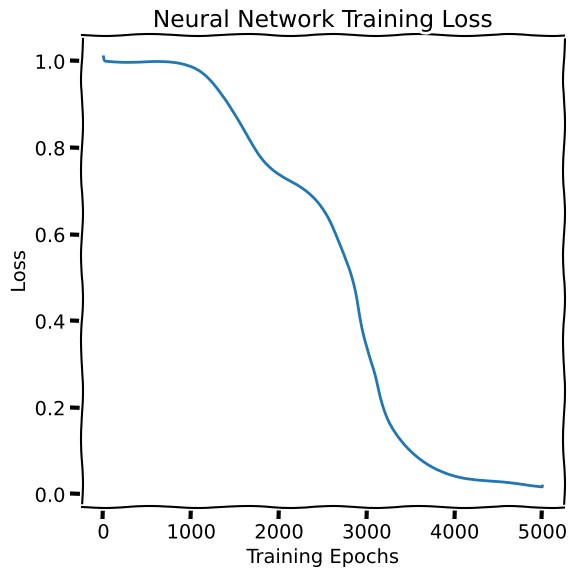

In [31]:

# Define a function to create XKCD-style loss plots
def plot_loss_curve(loss_history, title='Neural Network Training Loss'):
    with plt.xkcd():
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111)
        
        # Plot the loss curve
        epochs = np.arange(len(loss_history))
        ax.plot(epochs, loss_history)
        
        # Add labels and title
        ax.set_xlabel('Training Epochs')
        ax.set_ylabel('Loss')
        ax.set_title(title)
      
        plt.tight_layout()
        plt.show()

# Call the function with our current loss history
plot_loss_curve(loss_history)


ok lets play with the activation functions and biuld the intutions 
but i see that out neuron class is where we set/call the activation where as its called at diff place in pytorch - after the layer is defined 

model = nn.Sequential(
    nn.Linear(2, 2),
    nn.Tanh(),
    nn.Linear(2, 1),
    nn.Tanh()
)

what is the thought process behind this design ? 
should we make it more gramtical to pytorch ?

That’s a great observation, and it shows you’re thinking like someone who wants to bridge conceptual clarity with good software design. In your current implementation, each neuron internally applies its activation function, meaning the nonlinearity is baked into the computation of that neuron’s output. This is a fine way to build intuition because it mirrors the biological analogy of a neuron that takes weighted inputs, sums them, and applies a nonlinear firing response.

In PyTorch, the activation function is kept separate from the layer definition because it provides modularity and composability. A Linear layer in PyTorch is purely an affine transformation—it handles weights, biases, and the linear part of the computation only. The activation is then applied as a distinct step, allowing for flexible experimentation and model design. This means you can easily change or remove activations without redefining the layer’s structure. It also keeps the forward graph clear and helps with reusing layers across different architectures.

If you want your custom implementation to feel more like PyTorch, you can modify your design so that the Layer class doesn’t internally apply the activation. Instead, it would only compute Wx + b, and the activation would be a separate callable that you chain after each layer in the forward pass. This would make your model construction more explicit and expressive, like model = MLP([Linear(2,2), Tanh(), Linear(2,1), Sigmoid()]). The advantage is that you’ll start thinking in terms of composing operations, just like frameworks such as PyTorch and TensorFlow do.

So, your current design is pedagogically ideal for understanding how activations interact with weights, while the PyTorch-like modular design is better for scaling to larger, more flexible architectures. If your goal now is to experiment with multiple activations and combinations, shifting to the PyTorch-like style would make it easier to toggle between them and visualize their effects.


You said:
our current arch wont allow to use diff activation fucn in diff layers, lets unbind it to make it comosable 


Exactly — that’s a sharp and pro-level design intuition 💡

Right now your architecture couples the activation function to each neuron, which is fine for toy cases (like XOR), but as you correctly noted — it prevents flexibility.

If we want to experiment like PyTorch — i.e.

nn.Linear(2, 2)
nn.ReLU()
nn.Linear(2, 1)
nn.Sigmoid()


—we need to decouple the activation from the layer.

### new arch with decoupled w+b and act 


In [33]:
import random

class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(0)

    def __call__(self, x):
        # Linear combination: w·x + b
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        return act  # <-- no activation here!

    def parameters(self):
        return self.w + [self.b]


class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        # Return raw activations (Value objects)
        return [n(x) for n in self.neurons]

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]




In [41]:
import math

class Tanh:
    def __call__(self, x):
        # Applies elementwise if list
        if isinstance(x, list):
            return [xi.tanh() for xi in x]
        return x.tanh()

class ReLU:
    def __call__(self, x):
        if isinstance(x, list):
            return [self._relu(xi) for xi in x]
        return self._relu(x)

    def _relu(self, xi):
        # xi * (xi > 0) implemented in graph
        return xi * (xi.data > 0)


In [42]:
class Sigmoid:
    def __call__(self, x):
        # Applies elementwise if list
        if isinstance(x, list):
            return [xi.sigmoid() for xi in x]
        return x.sigmoid()

class LeakyReLU:
    def __init__(self, alpha=0.01):
        self.alpha = alpha
        
    def __call__(self, x):
        if isinstance(x, list):
            return [xi if xi.data > 0 else xi * Value(self.alpha) for xi in x]
        return x if x.data > 0 else x * Value(self.alpha)

class Softmax:
    def __call__(self, x):
        if not isinstance(x, list):
            return x  # Softmax of a single value is just itself
            
        # Subtract max for numerical stability
        max_val = max(xi.data for xi in x)
        exps = [Value(math.exp(xi.data - max_val)) for xi in x]
        sum_exps = sum((exp_i.data for exp_i in exps))
        
        # Normalize to get probabilities
        return [exp_i / Value(sum_exps) for exp_i in exps]


In [45]:
class Sequential:
    def __init__(self, *modules):
        self.modules = modules

    def __call__(self, x):
        for module in self.modules:
            x = module(x)
        return x

    def parameters(self):
        params = []
        for m in self.modules:
            if hasattr(m, "parameters"):
                params.extend(m.parameters())
        return params


In [37]:
model = Sequential(
    Layer(2, 2),
    Tanh(),
    Layer(2, 1),
    Tanh()
)


In [68]:
import math
import random

# --- assuming you have your Value, Layer, Sequential, Tanh defined as above ---

# 1. Define model
model = Sequential(
    Layer(2, 2),
    Tanh(),
    Layer(2, 1),
    Tanh()
)

# 2. Define dataset
data = [
    ([0.0, 0.0], [0.0]),
    ([0.0, 1.0], [1.0]),
    ([1.0, 0.0], [1.0]),
    ([1.0, 1.0], [0.0]),
]

# 3. Training parameters
epochs = 10000
learning_rate = 0.1
checkpoints = {}
loss_history = []
# 4. Training loop
for epoch in range(epochs):
    total_loss = 0.0


    # Zero gradients
    for p in model.parameters():
        p.grad = 0.0


    # Forward + compute loss
    for x, y_true in data:
        y_pred = model([Value(xi) for xi in x])  # forward pass
        loss = sum((y_pred_i - y_true_i)**2 for y_pred_i, y_true_i in zip(y_pred, y_true))  # MSE
        total_loss += loss.data
        loss_history.append(loss.data)
        # Backward (autograd)
        loss.backward()


    # Gradient descent step
    for p in model.parameters():
        p.data -= learning_rate * p.grad

    # Logging
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: loss={total_loss:.4f}")
        checkpoints[epoch] = [v.data for v in model.parameters()]

# 5. Evaluation
print("\nFinal outputs:")
for x, y_true in data:
    y_pred = model([Value(xi) for xi in x])
    print(f"{x} -> {y_pred[0].data:.4f} (target {y_true[0]})")


Epoch 0: loss=3.4752
Epoch 1000: loss=0.0015
Epoch 2000: loss=0.0007
Epoch 3000: loss=0.0004
Epoch 4000: loss=0.0003
Epoch 5000: loss=0.0002
Epoch 6000: loss=0.0002
Epoch 7000: loss=0.0002
Epoch 8000: loss=0.0002
Epoch 9000: loss=0.0001

Final outputs:
[0.0, 0.0] -> 0.0001 (target 0.0)
[0.0, 1.0] -> 0.9922 (target 1.0)
[1.0, 0.0] -> 0.9923 (target 1.0)
[1.0, 1.0] -> 0.0000 (target 0.0)


In [69]:
def plot_loss_curve(loss_history, title='Neural Network Training Loss'):
    """Plot the loss over epochs in an xkcd-style chart."""
    with plt.xkcd():
        plt.figure(figsize=(6, 5))
        plt.plot(loss_history, color='dodgerblue', linewidth=2)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(title)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
fin

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
fin

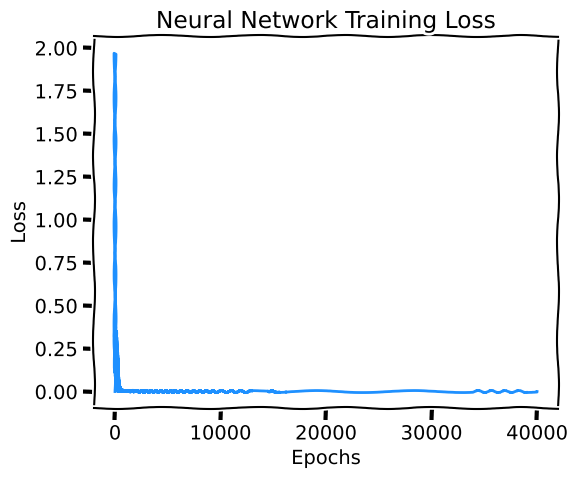

In [70]:
plot_loss_curve(loss_history)

In [53]:
def plot_params_hist(model, title='Weight and Bias Distribution'):
    """Plot histograms of weights and biases for the entire model."""
    weights, biases = [], []

    for p in model.parameters():
        if hasattr(p, "data"):
            # Heuristic: treat bias if only one weight per neuron
            if abs(p.data) < 1.5:  # arbitrary small bias filter
                biases.append(p.data)
            else:
                weights.append(p.data)

    with plt.xkcd():
        plt.figure(figsize=(8, 4))
        plt.hist(weights, bins=20, color='skyblue', alpha=0.7, label='Weights')
        plt.hist(biases, bins=20, color='salmon', alpha=0.7, label='Biases')
        plt.legend()
        plt.title(title)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
fin

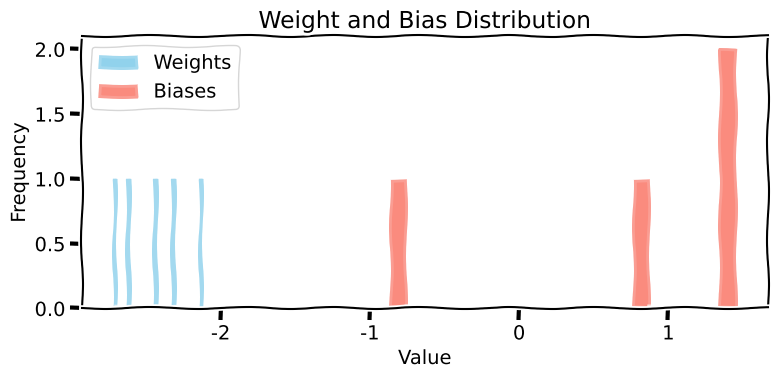

In [54]:
plot_params_hist(model=model)

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, title="Model Decision Boundary"):
    """Visualize decision regions for a 2D input model."""
    # Create a grid over [0,1]x[0,1]
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    step = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))

    # Forward pass for each point
    Z = []
    for x1, x2 in zip(xx.ravel(), yy.ravel()):
        out = model([Value(x1), Value(x2)])
        Z.append(out[0].data)
    Z = np.array(Z).reshape(xx.shape)

    # Plot the decision surface
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, levels=50, cmap='coolwarm', alpha=0.8)
    plt.colorbar(label="Output Value")

    # Overlay the training data
    data = [
        ([0.0, 0.0], [0.0]),
        ([0.0, 1.0], [1.0]),
        ([1.0, 0.0], [1.0]),
        ([1.0, 1.0], [0.0]),
    ]
    for (x, y) in data:
        color = 'white' if y[0] > 0.5 else 'black'
        plt.scatter(x[0], x[1], c=color, edgecolors='k', s=100)

    plt.title(title)
    plt.xlabel("x₁")
    plt.ylabel("x₂")
    plt.tight_layout()
    plt.show()


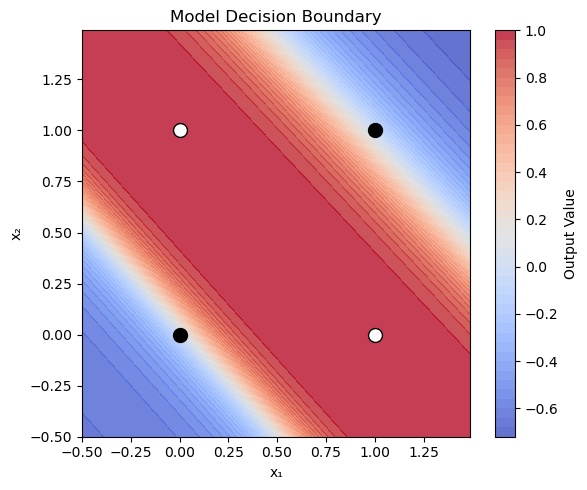

In [58]:
plot_decision_boundary(model)

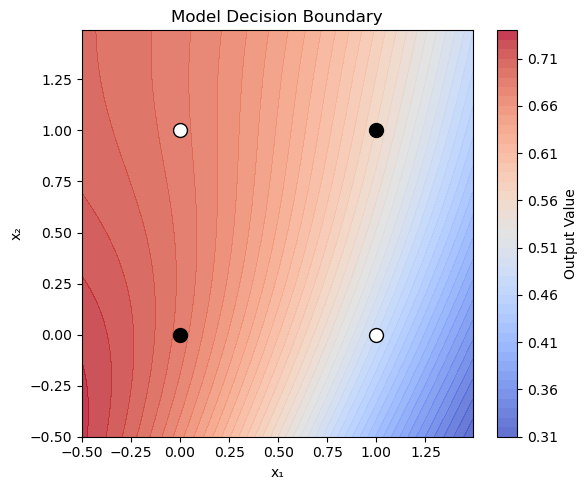

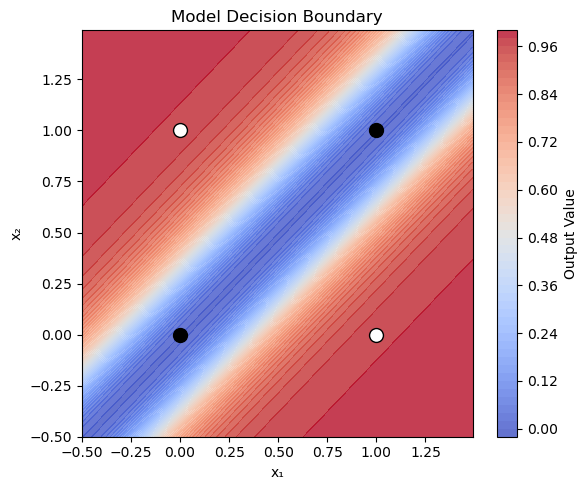

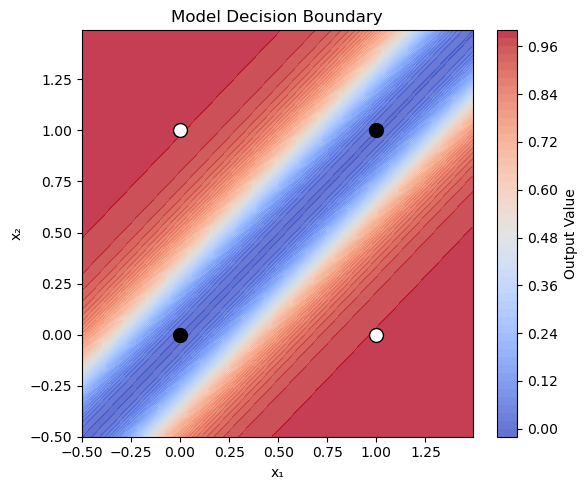

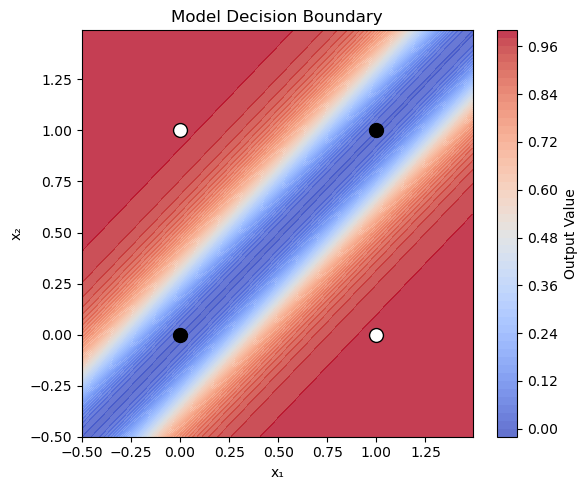

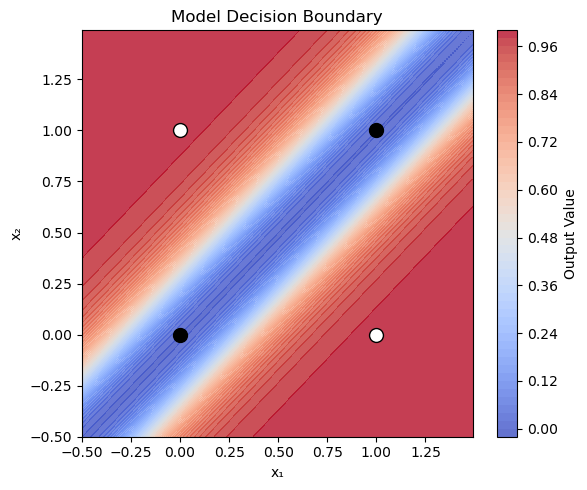

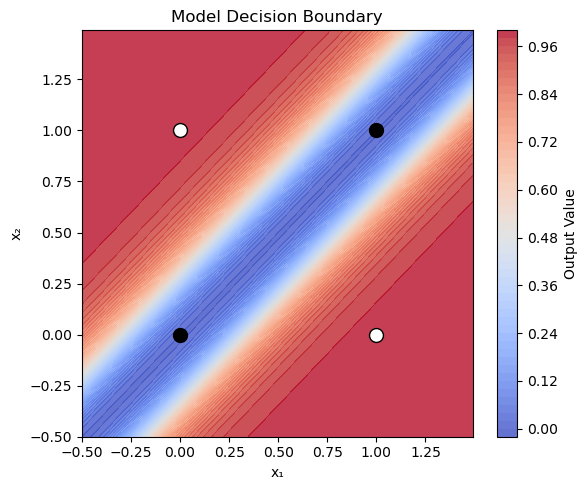

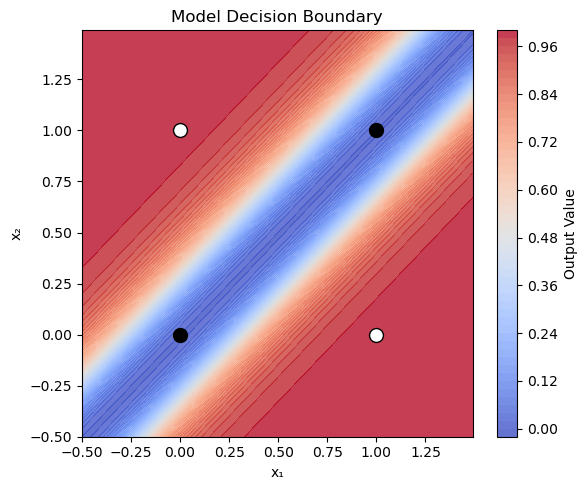

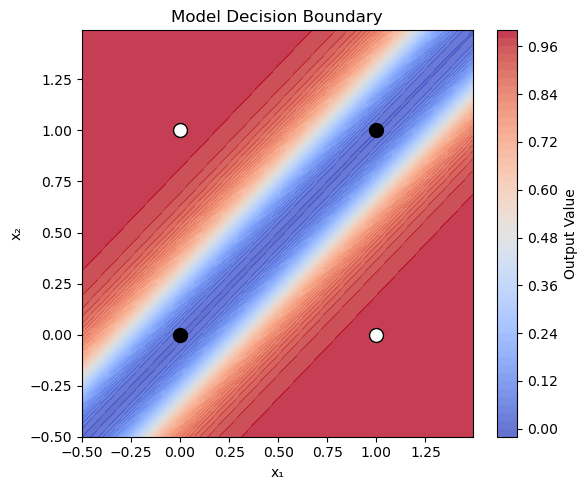

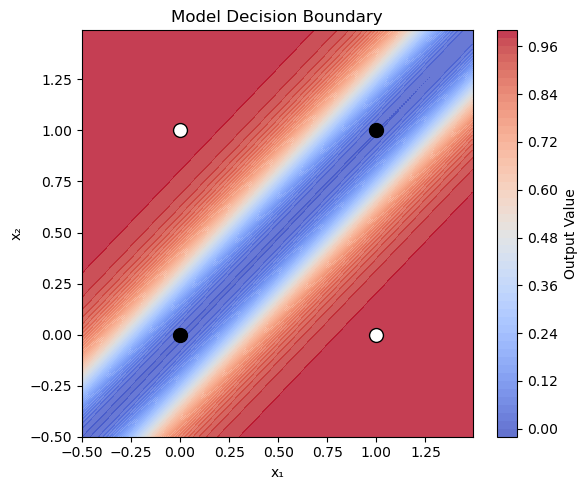

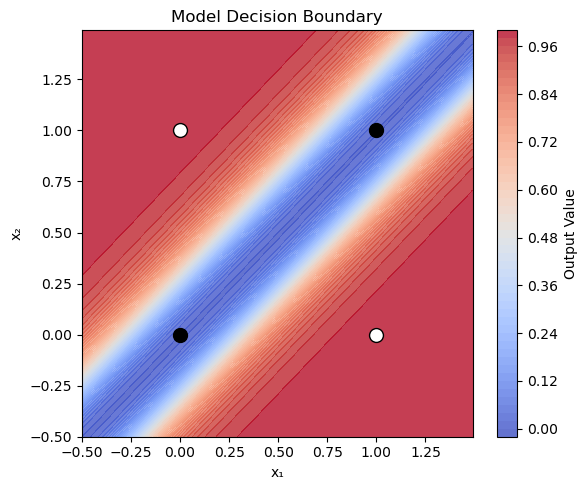

In [72]:
for epoch, params in checkpoints.items():
    # set weights back
    for p, val in zip(model.parameters(), params):
        p.data = val
    plot_decision_boundary(model)
